<a href="https://colab.research.google.com/github/balogun99/Face-Mask-Detection-using-Convolutional-Neural-Networks-CNN-/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configure the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from kaggle
# !#!/bin/bash
!kaggle datasets download --force omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 76% 124M/163M [00:00<00:00, 1.30GB/s]
100% 163M/163M [00:00<00:00, 1.16GB/s]


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


## **Importing the Dependencies**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1642.jpg', 'with_mask_2585.jpg', 'with_mask_480.jpg', 'with_mask_182.jpg', 'with_mask_2028.jpg']
['with_mask_2981.jpg', 'with_mask_577.jpg', 'with_mask_752.jpg', 'with_mask_378.jpg', 'with_mask_2942.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1867.jpg', 'without_mask_410.jpg', 'without_mask_3207.jpg', 'without_mask_1057.jpg', 'without_mask_2210.jpg']
['without_mask_73.jpg', 'without_mask_3603.jpg', 'without_mask_1195.jpg', 'without_mask_3544.jpg', 'without_mask_2871.jpg']


In [ ]:
print("Number of mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of mask images:  3725
Number of without mask images:  3828


## **Creating Labels for the two classes of images**

## **with_mask ==> 1**
## **without_mask ==> 0**

In [ ]:
# create the labels
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## **Display the Images**

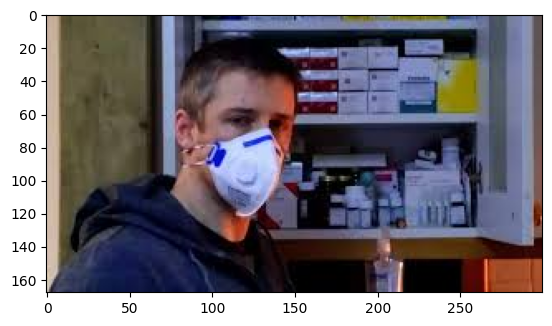

In [ ]:
# displaying the mask images
img = mpimg.imread('/content/data/with_mask/with_mask_2571.jpg')
imgplot = plt.imshow(img)
plt.show()

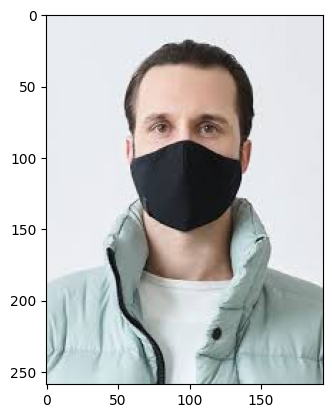

In [ ]:
# Displaying the image
img = mpimg.imread('/content/data/with_mask/with_mask_1642.jpg')
imgplot = plt.imshow(img)
plt.show()

## **Image Processing**



1.   Resize the images
2.   Convert the images to numpy arrays



In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       [[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       [[233, 236, 241],
        [233, 236, 241],
        [233, 236, 241],
        ...,
        [229, 230, 235],
        [229, 230, 235],
        [229, 230, 235]],

       ...,

       [[204, 221, 223],
        [211, 228, 231],
        [213, 230, 232],
        ...,
        [126, 147, 142],
        [119, 140, 137],
        [144, 164, 165]],

       [[215, 228, 230],
        [213, 227, 229],
        [219, 233, 235],
        ...,
        [134, 154, 151],
        [127, 148, 146],
        [148, 171, 169]],

       [[221, 233, 233],
        [222, 233, 234],
        [219, 232, 232],
        ...,
        [140, 159, 159],
        [133, 155, 154],
        [156, 180, 177]]], dtype=uint8)
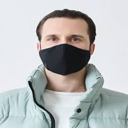

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list (data) and labels to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


# **Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[ 37,  39,  38],
        [ 38,  40,  39],
        [ 38,  40,  39],
        ...,
        [ 41,  52,  71],
        [ 43,  54,  77],
        [ 46,  58,  82]],

       [[ 37,  39,  38],
        [ 38,  40,  39],
        [ 38,  40,  39],
        ...,
        [ 43,  55,  76],
        [ 42,  54,  79],
        [ 43,  55,  81]],

       [[ 39,  41,  40],
        [ 38,  40,  39],
        [ 38,  40,  39],
        ...,
        [ 46,  57,  83],
        [ 46,  57,  86],
        [ 46,  57,  87]],

       ...,

       [[166, 188, 220],
        [166, 189, 220],
        [165, 189, 220],
        ...,
        [162, 167, 190],
        [165, 164, 187],
        [165, 163, 184]],

       [[167, 190, 221],
        [168, 191, 222],
        [168, 192, 223],
        ...,
        [160, 165, 189],
        [164, 163, 186],
        [165, 163, 185]],

       [[166, 190, 218],
        [167, 191, 219],
        [168, 192, 221],
        ...,
        [157, 162, 186],
        [163, 163, 185],
        [166, 164, 186]]], dtype=uint8)
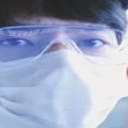

In [ ]:
X_train[0]

In [ ]:
X_test_scaled[0]

array([[[0.64705882, 0.65098039, 0.73333333],
        [0.6745098 , 0.67843137, 0.76078431],
        [0.72156863, 0.7254902 , 0.80392157],
        ...,
        [0.99607843, 0.99607843, 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.60392157, 0.60784314, 0.69019608],
        [0.64313725, 0.64313725, 0.7254902 ],
        [0.70588235, 0.70980392, 0.79215686],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.57647059, 0.58039216, 0.6627451 ],
        [0.61960784, 0.62745098, 0.70980392],
        [0.69803922, 0.70196078, 0.78431373],
        ...,
        [1.        , 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 0.99607843]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

# **Building Convolutinal Neural Network (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)
# validation_split is similar to test data, is used to understand how the model is performing on unknown data at each epoch

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - acc: 0.7474 - loss: 0.5876 - val_acc: 0.9107 - val_loss: 0.2340
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.8748 - loss: 0.3063 - val_acc: 0.9190 - val_loss: 0.2061
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8937 - loss: 0.2729 - val_acc: 0.9157 - val_loss: 0.2067
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9180 - loss: 0.2151 - val_acc: 0.9372 - val_loss: 0.1669
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9280 - loss: 0.1792 - val_acc: 0.9355 - val_loss: 0.1762


# **Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9223 - loss: 0.2317
Test Accuracy =  0.9159497022628784


## **Data Visualization**

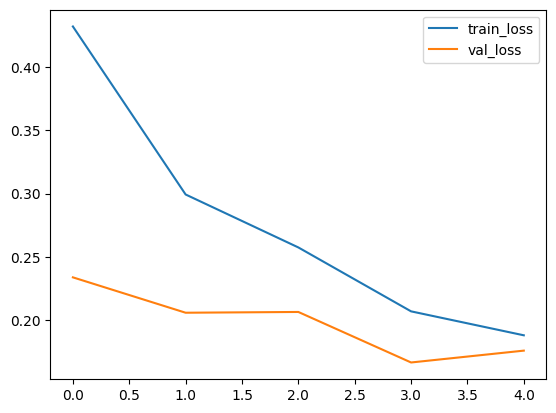

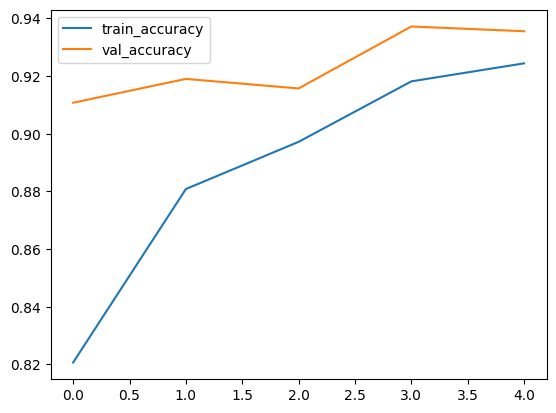

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


# plot the accuracy value
plt.plot(h.history['acc'], label='train_accuracy')
plt.plot(h.history['val_acc'], label='val_accuracy')
plt.legend()
plt.show()

# **Predictive System**

Path of the image to be predicted :/content/NO_MASK.jpg


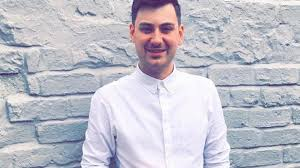

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.51907223 0.49489075]]
The person in the image is NOT wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted :')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is NOT wearing a mask')

In [ ]:
# saving the model
model.save('face_mask_detection_model.h5')